In [1]:
import pandas as pd

# Provide the path to your CSV file
file_path = "combined_rows.csv"

# Read the CSV file
data = pd.read_csv(file_path)

In [2]:
data
from sklearn.preprocessing import LabelEncoder
Output=LabelEncoder()
data['Output']=Output.fit_transform(data['Output'])

In [3]:
features_cols=['White Matter', 'Grey Matter',
                 'CSF', 'Accumbens', 'Amygdala', 'Caudate', 'Hippocampus',
                 'Putamen']
X=data[features_cols]
y=data.Output

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9090909090909091

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.86      0.86      0.86         7

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22



In [6]:
# Evaluate the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, rf.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.91


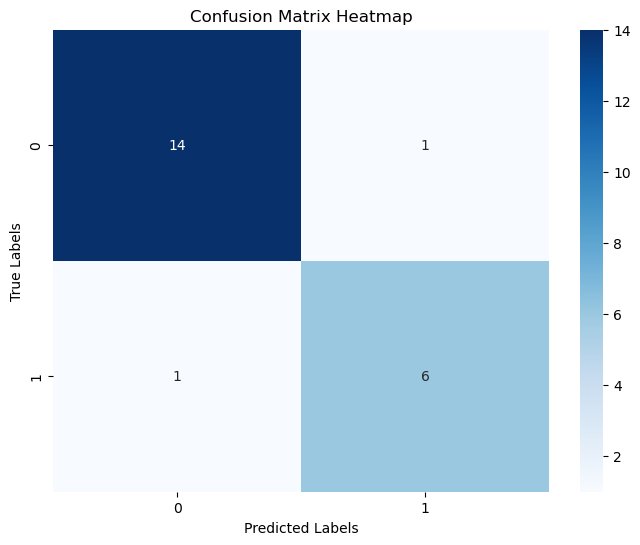

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate predictions for the test data
y_pred = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
